In [2]:
import sys
sys.path.append('..')
%load_ext autoreload
%autoreload 2
from targets.conditional_density_estimation_target import *
from models import CNDRE
from utils.visual import * 
import torch
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


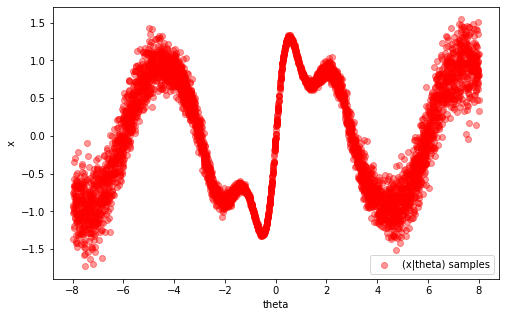

In [8]:
num_samples = 50000
target =Wave()
target.target_visual()
theta_samples, x_samples = target.make_dataset(num_samples)

In [16]:
epochs = 100
batch_size = 5000
cndre_proxy= CNDRE(x_samples, theta_samples,hidden_dims = [64,64,64], mode = 'Proxy')
cndre_proxy.train(epochs,batch_size)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:01<00:00,  1.22s/it, loss = 0.847969]


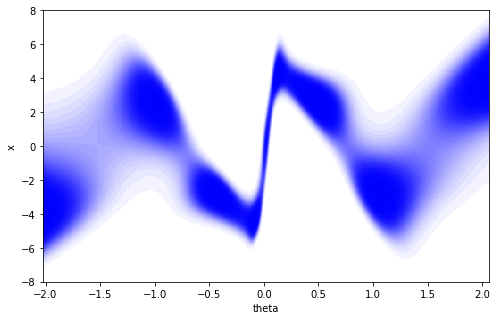

In [17]:
### Visualization p=d=1 -- Proxy mode ###

model_to_visualize = cndre_proxy
with torch.no_grad():
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot()
    ax.set_xlabel('theta')
    ax.set_ylabel('x')
    delta = 500
    x_tt = torch.linspace(torch.min(model_to_visualize.x_samples), torch.max(model_to_visualize.x_samples), delta)
    theta_tt = torch.linspace(torch.min(model_to_visualize.theta_samples), torch.max(model_to_visualize.theta_samples), delta)
    ax.pcolormesh(x_tt,theta_tt,torch.exp(model_to_visualize.log_density(x_tt.unsqueeze(-1).unsqueeze(1).repeat(1, delta, 1), theta_tt.unsqueeze(-1).unsqueeze(0).repeat(delta, 1, 1))).numpy(), cmap = blue_cmap)

In [18]:
epochs = 100
batch_size = 5000
cndre_ratio= CNDRE(x_samples, theta_samples,hidden_dims = [64,64,64], mode = 'Ratio')
cndre_ratio.train(epochs,batch_size)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:08<00:00,  1.29s/it, loss = 0.956597]


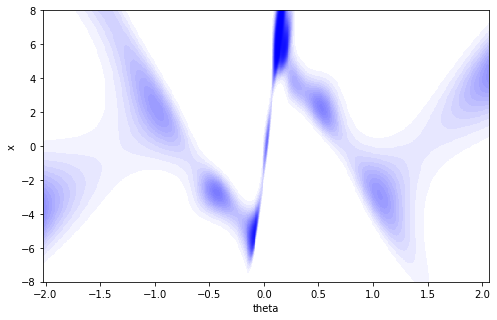

In [20]:
### Visualization p=d=1 -- Proxy mode ###

model_to_visualize = cndre_ratio
with torch.no_grad():
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot()
    ax.set_xlabel('theta')
    ax.set_ylabel('x')
    delta = 500
    x_tt = torch.linspace(torch.min(model_to_visualize.x_samples), torch.max(model_to_visualize.x_samples), delta)
    theta_tt = torch.linspace(torch.min(model_to_visualize.theta_samples), torch.max(model_to_visualize.theta_samples), delta)
    ax.pcolormesh(x_tt,theta_tt,torch.exp(model_to_visualize.log_ratio(x_tt.unsqueeze(-1).unsqueeze(1).repeat(1, delta, 1), theta_tt.unsqueeze(-1).unsqueeze(0).repeat(delta, 1, 1))).numpy(), cmap = blue_cmap)